In [3]:
import heapq
import itertools
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
# --- Problem 1: The Bottle World Problem ---

class BottleWorld:
    def __init__(self, initial, goal):
        self.initial = tuple(initial)
        self.goal = tuple(goal)
        self.valid_swaps = [(0, 1), (1, 2), (1, 3)]  # Allowed swaps based on problem constraints
    
    def is_valid_state(self, state):
        return state.index('A') < state.index('D')  # Ensuring 'A' is always left of 'D'
    
    def successors(self, state):
        state = list(state)
        successors = []
        for x, y in self.valid_swaps:
            new_state = state[:]
            new_state[x], new_state[y] = new_state[y], new_state[x]  # Swap two bottles
            if self.is_valid_state(new_state):
                successors.append(tuple(new_state))
        return successors
    
    def heuristic(self, state):
        return sum(1 for i, j in zip(state, self.goal) if i != j)  # Counting misplaced bottles
    
    def best_first_search(self):
        frontier = [(self.heuristic(self.initial), 0, self.initial)]  # Priority queue with heuristic
        heapq.heapify(frontier)
        visited = set()
        while frontier:
            f_n, cost, state = heapq.heappop(frontier)
            if state in visited:
                continue
            visited.add(state)
            print(f"Exploring {state} with f(n)={f_n}")
            if state == self.goal:
                return cost  # Return the cost when goal is reached
            for successor in self.successors(state):
                heapq.heappush(frontier, (self.heuristic(successor) + cost + 1, cost + 1, successor))
        return -1  # Return -1 if no solution found

def draw_state_space():
    G = nx.DiGraph()
    states = set()
    initial = ('A', 'B', 'C', 'D')
    queue = deque([initial])
    
    while queue:
        state = queue.popleft()
        if state in states:
            continue
        states.add(state)
        for swap in [(0, 1), (1, 2), (1, 3)]:
            new_state = list(state)
            new_state[swap[0]], new_state[swap[1]] = new_state[swap[1]], new_state[swap[0]]
            new_state = tuple(new_state)
            if new_state.index('A') < new_state.index('D'):  # Ensuring valid states
                G.add_edge("".join(state), "".join(new_state))
                queue.append(new_state)
    
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G)  # Generate layout for visualization
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)
    plt.title("State-Space Graph for Bottle World")
    plt.show()


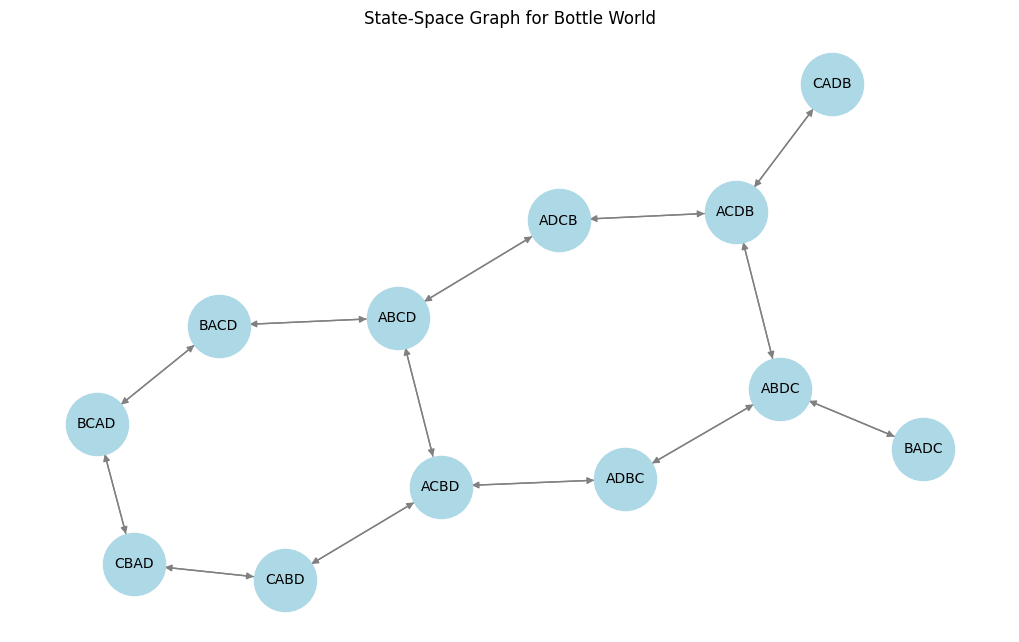

Exploring ('A', 'D', 'B', 'C') with f(n)=4
Exploring ('A', 'B', 'D', 'C') with f(n)=4
Exploring ('A', 'C', 'B', 'D') with f(n)=4
Exploring ('A', 'B', 'C', 'D') with f(n)=4
Exploring ('C', 'A', 'B', 'D') with f(n)=4
Exploring ('C', 'B', 'A', 'D') with f(n)=3
Best-First Search Moves: 3


In [5]:
draw_state_space()

bottle_problem = BottleWorld(['A', 'D', 'B', 'C'], ['C', 'B', 'A', 'D'])
print("Best-First Search Moves:", bottle_problem.best_first_search())


In [6]:
# --- Problem 2: Alpha-Beta Pruning ---

def minimax(node, depth, alpha, beta, maximizing_player):
    if isinstance(node, int):
        return node  # Leaf node reached, return value
    
    if maximizing_player:
        max_eval = float('-inf')
        for child in node:
            eval = minimax(child, depth + 1, alpha, beta, False)
            max_eval = max(max_eval, eval)
            alpha = max(alpha, eval)
            if beta <= alpha:  # Alpha-beta pruning condition
                print(f"Pruning at depth {depth} with alpha={alpha} and beta={beta}")
                break
        return max_eval
    else:
        min_eval = float('inf')
        for child in node:
            eval = minimax(child, depth + 1, alpha, beta, True)
            min_eval = min(min_eval, eval)
            beta = min(beta, eval)
            if beta <= alpha:  # Alpha-beta pruning condition
                print(f"Pruning at depth {depth} with alpha={alpha} and beta={beta}")
                break
        return min_eval

In [7]:
game_tree = [[3, [5, [6, 7]]], [1, [4, 2]]]
optimal_value = minimax(game_tree, 0, float('-inf'), float('inf'), False)
print("Optimal Move for MIN:", optimal_value)

Pruning at depth 3 with alpha=6 and beta=5
Optimal Move for MIN: 2


In [8]:
# --- Problem 3: Solving the Eight-Puzzle with A* ---

def manhattan_distance(state, goal):
    distance = 0
    for i in range(9):
        if state[i] == 0:
            continue  # Ignore empty tile
        x1, y1 = divmod(state.index(state[i]), 3)
        x2, y2 = divmod(goal.index(state[i]), 3)
        distance += abs(x1 - x2) + abs(y1 - y2)  # Manhattan distance calculation
    return distance

def a_star(initial, goal):
    frontier = [(manhattan_distance(initial, goal), 0, initial, [])]
    heapq.heapify(frontier)
    visited = set()
    while frontier:
        _, cost, state, path = heapq.heappop(frontier)
        if state == goal:
            return path + [state]  # Return solution path
        visited.add(tuple(state))
        zero_idx = state.index(0)
        for move in [-3, 3, -1, 1]:  # Possible moves: up, down, left, right
            new_idx = zero_idx + move
            if 0 <= new_idx < 9 and (zero_idx % 3 == 0 and move == -1) is False and (zero_idx % 3 == 2 and move == 1) is False:
                new_state = state[:]
                new_state[zero_idx], new_state[new_idx] = new_state[new_idx], new_state[zero_idx]  # Swap empty tile
                if tuple(new_state) not in visited:
                    heapq.heappush(frontier, (manhattan_distance(new_state, goal) + cost + 1, cost + 1, new_state, path + [state]))
                    print(f"Moved {state} -> {new_state}")
    return []  # Return empty list if no solution found


In [9]:
initial_puzzle = [2, 8, 3, 1, 6, 4, 7, 0, 5]
goal_puzzle = [1, 2, 3, 8, 0, 4, 7, 6, 5]
solution = a_star(initial_puzzle, goal_puzzle)
print("A* Solution:", solution)

Moved [2, 8, 3, 1, 6, 4, 7, 0, 5] -> [2, 8, 3, 1, 0, 4, 7, 6, 5]
Moved [2, 8, 3, 1, 6, 4, 7, 0, 5] -> [2, 8, 3, 1, 6, 4, 0, 7, 5]
Moved [2, 8, 3, 1, 6, 4, 7, 0, 5] -> [2, 8, 3, 1, 6, 4, 7, 5, 0]
Moved [2, 8, 3, 1, 0, 4, 7, 6, 5] -> [2, 0, 3, 1, 8, 4, 7, 6, 5]
Moved [2, 8, 3, 1, 0, 4, 7, 6, 5] -> [2, 8, 3, 0, 1, 4, 7, 6, 5]
Moved [2, 8, 3, 1, 0, 4, 7, 6, 5] -> [2, 8, 3, 1, 4, 0, 7, 6, 5]
Moved [2, 0, 3, 1, 8, 4, 7, 6, 5] -> [0, 2, 3, 1, 8, 4, 7, 6, 5]
Moved [2, 0, 3, 1, 8, 4, 7, 6, 5] -> [2, 3, 0, 1, 8, 4, 7, 6, 5]
Moved [0, 2, 3, 1, 8, 4, 7, 6, 5] -> [1, 2, 3, 0, 8, 4, 7, 6, 5]
Moved [1, 2, 3, 0, 8, 4, 7, 6, 5] -> [1, 2, 3, 7, 8, 4, 0, 6, 5]
Moved [1, 2, 3, 0, 8, 4, 7, 6, 5] -> [1, 2, 3, 8, 0, 4, 7, 6, 5]
A* Solution: [[2, 8, 3, 1, 6, 4, 7, 0, 5], [2, 8, 3, 1, 0, 4, 7, 6, 5], [2, 0, 3, 1, 8, 4, 7, 6, 5], [0, 2, 3, 1, 8, 4, 7, 6, 5], [1, 2, 3, 0, 8, 4, 7, 6, 5], [1, 2, 3, 8, 0, 4, 7, 6, 5]]
